## Gait Video Study
### Code to compute errors between true and detected HSRs from the treadmill GAITCYCLES.csv file
1. We plot in red stars the actual HSRs and in blue dots the detected HSRs
2. We compute the error series defining the difference between each detected HSR and it's closest true HSR 
3. We plot the histogram of the error series 
4. We compute the mean, absolute mean, SD, absolute SD of the error series 


In [61]:
!pip install ipympl==0.2.1

  Found existing installation: ipympl 0.5.7
    Uninstalling ipympl-0.5.7:
      Successfully uninstalled ipympl-0.5.7


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [74]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os
import pandas as pd
import shutil

In [75]:
#Change paths accordingly
trueHSR_path = 'C:\\Users\\rk4\\Box\\Gait Video Project\\GaitVideoData\\video\\trueHSR'
detectedHSR_path = 'C:\\Users\\rk4\\Box\\'
frame_path_merged = 'C:\\Users\\rk4\\Box\\Gait Video Project\\GaitVideoData\\video\\multi_view_merged_data\\'

#Configuration for which to run the code for 
cohorts = ['\\HOA', '\\MS', '\\PD', '\\ExtraHOA']
trials = ['\\beam_walking', '\\walking']

In [76]:
#Run only once to create true HSR directory 
# #Saving the HSRframes.txt file to the trueHSR\\ folder 
# for cohort in cohorts:
#     for trial in trials:
#         merged_path = frame_path_merged+cohort+trial 
#         if (os.path.exists(merged_path)):
#             videos = os.listdir(merged_path)
# #             print (len(videos))
#             for video in videos:
#                 trueHSRfile_loc = merged_path+'\\'+video+'\\hip_height_normalized\\HSRframes.txt'
#         #             print (open(trueHSRfile_loc).read())
#                 new_loc = trueHSR_path+cohort+trial+'\\'+video+'_HSRframes.txt'
#                 shutil.copy(trueHSRfile_loc, new_loc) 
#                 print ('HSR for', video, 'copied')

### Utility functions

In [114]:
#Function to read the detected and true HSR files
def read_detected_true_HSRs(folder_name, file_name, cohort, trial, video):
    #Detected HSRs
    labelled_file = pd.read_excel(detectedHSR_path+folder_name+file_name)
    labelled_file_HSR = labelled_file[labelled_file['EventType']=='HSR']
    detected_HSR_frames = labelled_file_HSR.dropna()['frame_number'].values
    detected_HSR_frames = [int(a) for a in detected_HSR_frames]

    #True HSRs
    true_HSR_frames = open(trueHSR_path+cohort+trial+'\\'+video+'_HSRframes.txt').read()
    true_HSR_frames = [int(a) for a in true_HSR_frames.split(',')]
    return detected_HSR_frames, true_HSR_frames

In [115]:
#Function to plot the detected and true HSRs
def plot_detected_trueHSR(detected_HSR_frames, true_HSR_frames, folder_name, video):
    fig= plt.figure(figsize = (13.5, 3))
    ax1 = fig.add_subplot(111)
    ax1.plot(detected_HSR_frames, [1]*len(detected_HSR_frames), 'bd', ms = 6, alpha = 0.5,\
             label = 'detected HSR')
    ax1.plot(true_HSR_frames, [1]*len(true_HSR_frames),'r*', ms = 6, alpha = 0.5, label = 'true HSR')
    plt.legend()
    plt.title('Detected and true HSRs for '+video)
    plt.show()
    plt.savefig(detectedHSR_path+folder_name+video+ '_detected_true_HSRs.png', dpi = 250)
    plt.close()

In [116]:
#Computing the error series and error stats between true and detected HSRs and saving to a .txt file
def compute_errors(detected_HSR_frames, true_HSR_frames, folder_name, video):
    #For each detected HSR, error is defined as the difference of it with the closest true HSR 
    abs_error_indices = [np.argmin(abs(i-np.array(true_HSR_frames))) for i in detected_HSR_frames]
    #Error
    error = [i-true_HSR_frames[j] for i, j in zip(detected_HSR_frames, abs_error_indices)]
    #Absolute error
    abs_error = list(map(abs, error))
    #Mean, Std, mean(abs), std(abs)
    error_stats = [np.mean(error), np.std(error), np.mean(abs_error), np.std(abs_error)]
    #Completely undetected/missed frames from true HSR 
    len_trueHSR_frames = list(range(len(true_HSR_frames)))
    trueHSR_undetected_frames = list(set(len_trueHSR_frames).difference(abs_error_indices))

    #Writing the errors, absolute error, error stats and undetected frames to a .txt file
    with open(detectedHSR_path+folder_name+video+'_errorfile.txt', 'w') as filehandle:
        filehandle.writelines("%d, " % i for i in error) #Errors
        filehandle.writelines("\n")
        filehandle.writelines("%d, " % i for i in abs_error) #Absolute errors 
        filehandle.writelines("\n")
        filehandle.writelines("%d, " % i for i in error_stats) 
        #Error stats (mean, std, mean(abs) std(abs))
        filehandle.writelines("\n")
        filehandle.writelines("%d, " % i for i in trueHSR_undetected_frames) 
        #Undetected/missed true HSR frames
    return error, abs_error, error_stats, trueHSR_undetected_frames

### main()

In [117]:
#Change paths accordingly
folder_name = 'Reema Thakkar\\'
file_name = 'GVS_213_T_T1_GAITCYCLESframedata.xlsx'
cohort = '\\HOA'
trial = '\\beam_walking'
video = file_name[:12]

#Reading the detected and true HSRs from the files
detected_HSR_frames, true_HSR_frames = read_detected_true_HSRs(folder_name, file_name, cohort, trial, video)

#Printing the detected and true HSRs
print('detected_HSR_frames\n', detected_HSR_frames)
print ('true_HSR_frames\n', true_HSR_frames) 

detected_HSR_frames
 [99, 136, 173, 211, 251, 291, 334, 374, 416, 454, 492, 530, 567, 607, 644, 719, 756, 794, 834, 873, 913, 953, 995, 1036, 1077, 1118, 1160, 1202, 1243, 1284, 1326, 1371, 1414, 1457, 1502, 1547, 1591, 1636, 1681, 1726]
true_HSR_frames
 [28, 65, 103, 145, 178, 216, 254, 295, 339, 378, 420, 458, 497, 533, 574, 613, 648, 686, 723, 761, 798, 836, 877, 916, 957, 997, 1040, 1080, 1123, 1165, 1206, 1247, 1289, 1330, 1374, 1417, 1461, 1505, 1549, 1593, 1639, 1684, 1729]


### Plotting detected and true HSRs

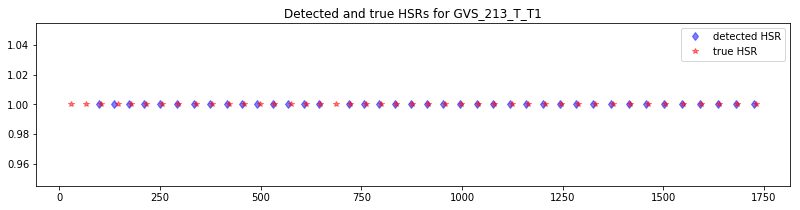

In [118]:
#Plotting the detected and true HSRs
plot_detected_trueHSR(detected_HSR_frames, true_HSR_frames, folder_name, video)

### Error analysis 

In [121]:
#Computing the error series and error stats between true and detected HSRs
error, abs_error, error_stats, trueHSR_undetected_frames = compute_errors(detected_HSR_frames, true_HSR_frames, folder_name, video)
# Note that these values are all in frames. Divide by 30 to get in seconds. 
print ('error list (in frames): ', error)
print ('absolute error list (in frames): ', abs_error)
print ('error stats (in frames): ', error_stats)
print ('Undetected/missed true HSR frames (in frames): ', trueHSR_undetected_frames)

error list (in frames):  [-4, -9, -5, -5, -3, -4, -5, -4, -4, -4, -5, -3, -7, -6, -4, -4, -5, -4, -2, -4, -3, -4, -2, -4, -3, -5, -5, -4, -4, -5, -4, -3, -3, -4, -3, -2, -2, -3, -3, -3]
absolute error list (in frames):  [4, 9, 5, 5, 3, 4, 5, 4, 4, 4, 5, 3, 7, 6, 4, 4, 5, 4, 2, 4, 3, 4, 2, 4, 3, 5, 5, 4, 4, 5, 4, 3, 3, 4, 3, 2, 2, 3, 3, 3]
error stats (in frames):  [-4.0, 1.3416407864998738, 4.0, 1.3416407864998738]
Undetected/missed true HSR frames (in frames):  [0, 1, 17]


### Histogram of errors

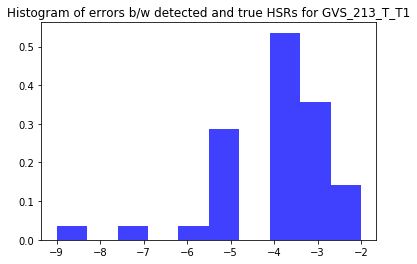

In [131]:
#Histogram of errors for distribution 
plt.figure()
plt.hist(error, color='b', density=True, alpha=0.75)
plt.title('Histogram of errors b/w detected and true HSRs for '+video)
plt.savefig(detectedHSR_path+folder_name+video+'_histogram_errors.png', dpi = 250)
plt.show()